In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("winequality-red.csv")

In [3]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [5]:
data.shape

(1599, 12)

In [6]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
model=Sequential()

In [8]:
model.add(Dense(22,input_shape=(11,),activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(6,activation="softmax"))

C:\Users\Hi\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
data.dropna(inplace=True)

In [10]:
x=data.drop("quality",axis=1)
y=data["quality"]

In [11]:
import numpy as np

In [12]:
y=np.asarray(y)

In [13]:
encoder=OneHotEncoder(sparse=False)

In [14]:
y=encoder.fit_transform(y.reshape(-1,1))

In [15]:
model.compile(optimizer="adam",loss="categorical_crossentropy")

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [18]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=121)

Epoch 1/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.6070 - val_loss: 1.3222
Epoch 2/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3361 - val_loss: 1.2772
Epoch 3/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2728 - val_loss: 1.2421
Epoch 4/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2693 - val_loss: 1.2164
Epoch 5/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2676 - val_loss: 1.2006
Epoch 6/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2360 - val_loss: 1.1896
Epoch 7/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2307 - val_loss: 1.1811
Epoch 8/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2518 - val_loss: 1.1758
Epoch 9/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2137 - val_loss: 1.1711
Epoch 10/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2050 - val_loss: 1.1636
Epoch 11/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2013 - val_loss: 1.1580
Epoch 12/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0753 - val_loss: 1.1080
Epoch 70/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1058 - val_loss: 1.1029
Epoch 71/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0751 - val_loss: 1.1089
Epoch 72/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0298 - val_loss: 1.1297
Epoch 73/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0834 - val_loss: 1.0979
Epoch 74/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0813 - val_loss: 1.0928
Epoch 75/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0811 - val_loss: 1.0980
Epoch 76/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0871 - val_loss: 1.0967
Epoch 77/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0688 - val_loss: 1.1011
Epoch 78/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1004 - val_loss: 1.0940
Epoch 79/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0703 - val_loss: 1.1125
Epoch 80/121
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0272 

In [19]:
loss_df=pd.DataFrame(model.history.history)

<AxesSubplot:>

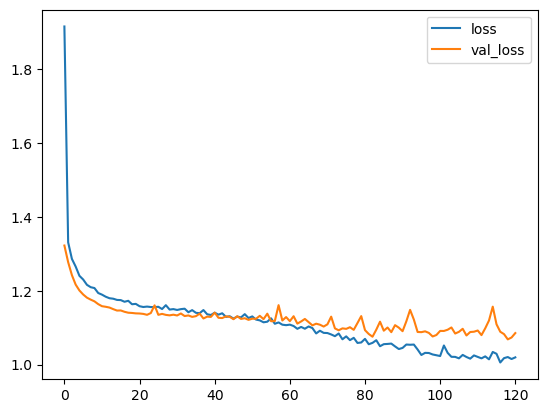

In [20]:
loss_df.plot(kind="line")

In [21]:
predictions=model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [22]:
print(predictions)

[[0.0112082  0.06773165 0.24362005 0.49762017 0.16532825 0.01449169]
 [0.00210347 0.04843046 0.43679112 0.46268415 0.047288   0.00270274]
 [0.01146588 0.06790154 0.24085993 0.4968913  0.16805509 0.01482627]
 ...
 [0.01099208 0.06758215 0.24598293 0.49820733 0.16302443 0.01421112]
 [0.02792834 0.06873191 0.1333397  0.42331508 0.31042293 0.03626204]
 [0.000671   0.03494177 0.55218697 0.39183438 0.01950702 0.00085888]]
